In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"/kaggle/input/customer-personality-analysis/marketing_campaign.csv", delimiter='\t')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

#### The purpose of this project will be to group similar customers based on their traits and behaviour. Instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Handling Missing values

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: xlabel='Income'>

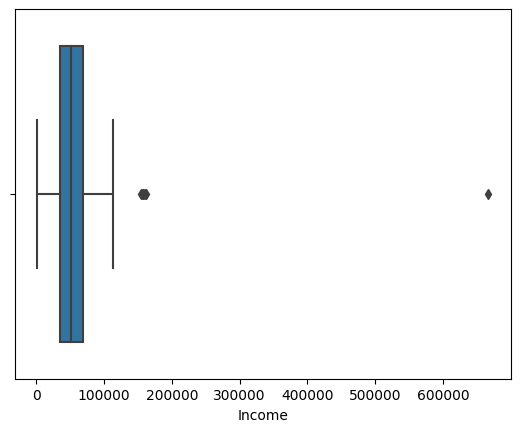

In [5]:
sns.boxplot(data = df, x = 'Income')

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [7]:
df[df['Income']>600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


In [8]:
df.drop(2233, axis = 0, inplace = True)

# Feature Engineering and Data Pre processing

In [9]:
# Creating age feature from Customer's Birth year
df['Age'] = 2024 - df['Year_Birth']

In [10]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2239, dtype: object

In [11]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format = '%d-%m-%Y')

In [12]:
# Creating feature to demonstrate the number of days since the customer enrolled
from datetime import datetime 
now = datetime.now()
df['Days_Since_Customer'] = df.Dt_Customer.apply(lambda x: (now - x).total_seconds()/ (60 * 60 * 24))

In [13]:
df['Education'].value_counts()

Education
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [14]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
#Current marital status of the customer
marital_map = {'Absurd': 1, 'Alone': 1, 'YOLO': 1, 'Single': 1,
              'Married': 2, 'Together': 2, 'Widow': 1, 'Divorced': 1}
df['Marital_Status'] = df.Marital_Status.map(marital_map)

In [16]:
#Number of kids in the family
df['Num_Kids'] = df['Kidhome'] + df['Teenhome']

#Number of family members
df['Fam_Size'] = df['Marital_Status'] + df['Num_Kids']

In [17]:
#Number of accepted offers by the customer from the previous 5 campaigns
df['Num_Accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [18]:
#Total amount spent in the last two years by the customer
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [19]:
df['Z_CostContact'].value_counts()

Z_CostContact
3    2239
Name: count, dtype: int64

In [20]:
df['Z_Revenue'].value_counts()

Z_Revenue
11    2239
Name: count, dtype: int64

In [21]:
#Dropping the unnecessary columns 
df.drop(['Dt_Customer', 'Year_Birth', 'AcceptedCmp1', 'AcceptedCmp2',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Kidhome', 'Teenhome',
                   'Z_CostContact', 'Z_Revenue', 'Num_Kids', 'Marital_Status'],
                   axis=1, inplace=True)
df.head() 


,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Fam_Size,Num_Accepted,MntTotal
0,5524,Graduation,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,67,4333.737757,1,0,1617
1,2174,Graduation,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,70,3783.737757,3,0,27
2,4141,Graduation,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,59,3982.737757,2,0,776
3,6182,Graduation,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,40,3809.737757,3,0,53
4,5324,PhD,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,43,3831.737757,3,0,422


In [22]:
df.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Fam_Size,Num_Accepted,MntTotal
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,51963.554712,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213,0.009379,0.149174,55.197856,4024.302741,2.594908,0.297901,606.041090
std,3246.372471,21410.672116,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144,0.096412,0.356339,11.985494,202.166032,0.907122,0.678503,602.274089
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,3670.737757,1.000000,0.000000,5.000000
25%,2827.500000,35533.500000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,47.000000,3851.237757,2.000000,0.000000,69.000000
50%,5455.000000,51381.500000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,54.000000,4025.737757,3.000000,0.000000,396.000000
75%,8423.500000,68277.500000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,65.000000,4199.737757,3.000000,0.000000,1046.000000
max,11191.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,131.000000,4369.737757,5.000000,4.000000,2525.000000


# Visualizing the data

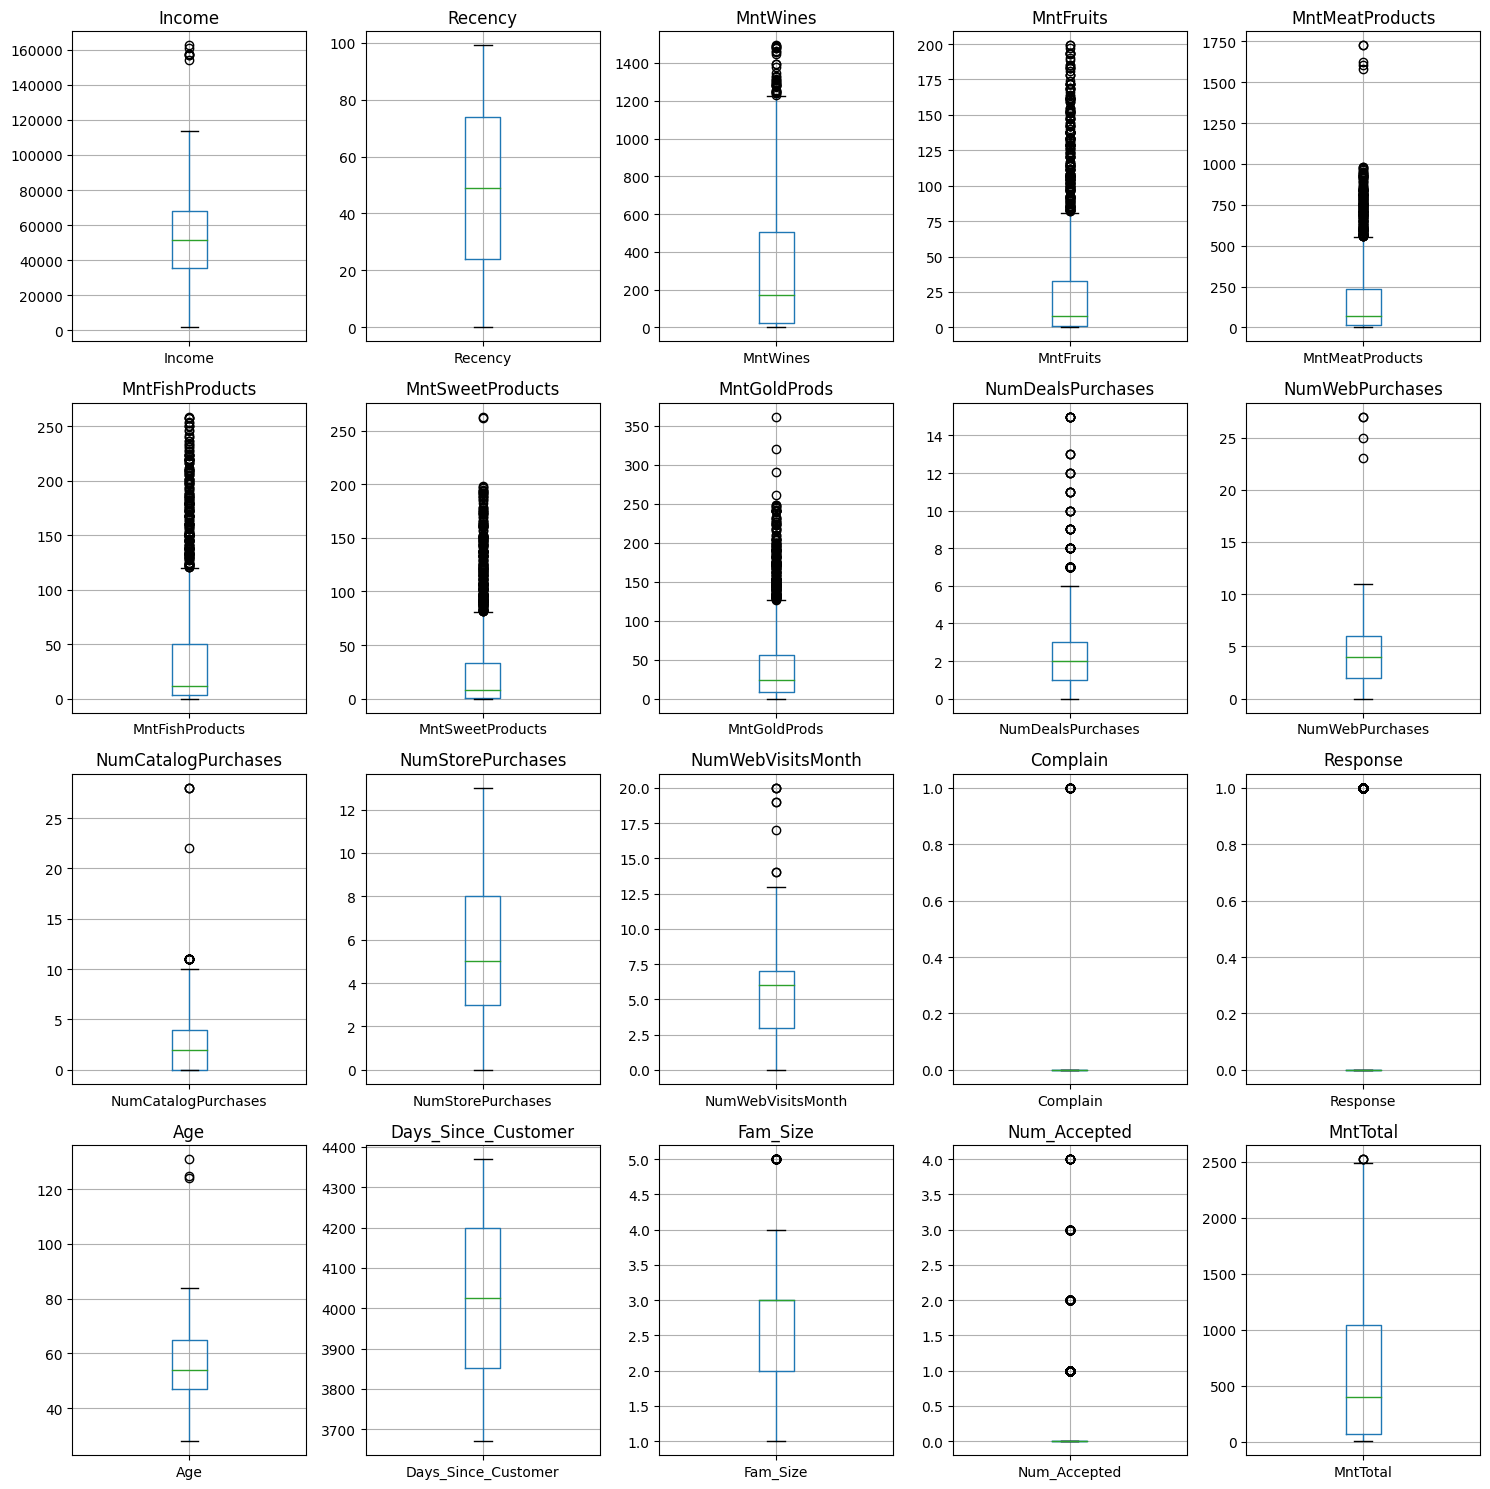

In [23]:
columns = df.drop(['ID', 'Education'], axis=1).columns
n_cols = 5  # Number of columns in the grid
n_rows = int(np.ceil(len(columns) / n_cols))  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes for easy iteration

for i, col in enumerate(columns):
    df.boxplot(col, ax=axes[i])
    axes[i].set_title(col)
    
# Hide any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Since our target column's distribution is itself skewed, we will not remove the outliers as we may loose crucial patterns needed for clustering**

<Axes: xlabel='Response', ylabel='Income'>

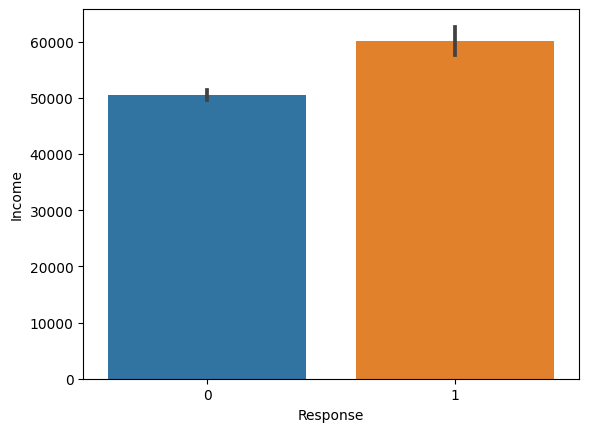

In [24]:
sns.barplot(data = df, x = 'Response', y = 'Income')

<Axes: xlabel='Education', ylabel='Income'>

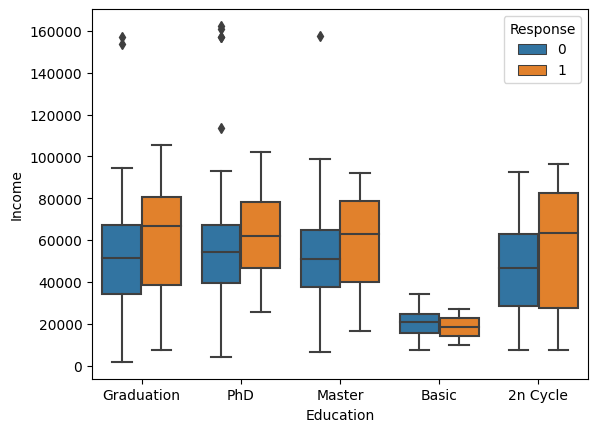

In [25]:
sns.boxplot(data = df, x = 'Education', y = 'Income', hue = 'Response')

<Axes: xlabel='Education', ylabel='Income'>

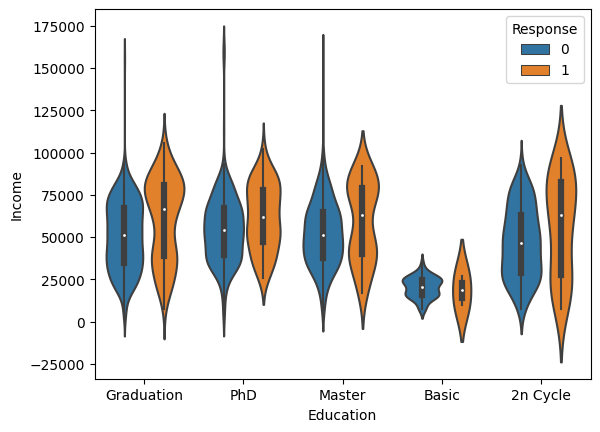

In [26]:
sns.violinplot(data = df, x = 'Education', y = 'Income', hue = 'Response')

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: xlabel='Recency', ylabel='Count'>

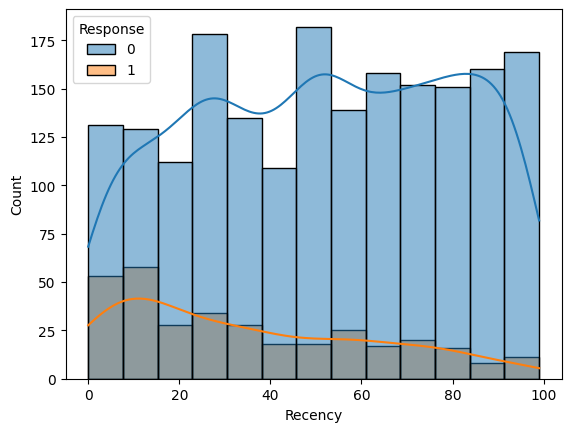

In [28]:
# Recency: Number of days since customer's last purchase
sns.histplot(data = df, x ='Recency',hue = 'Response', kde = True)

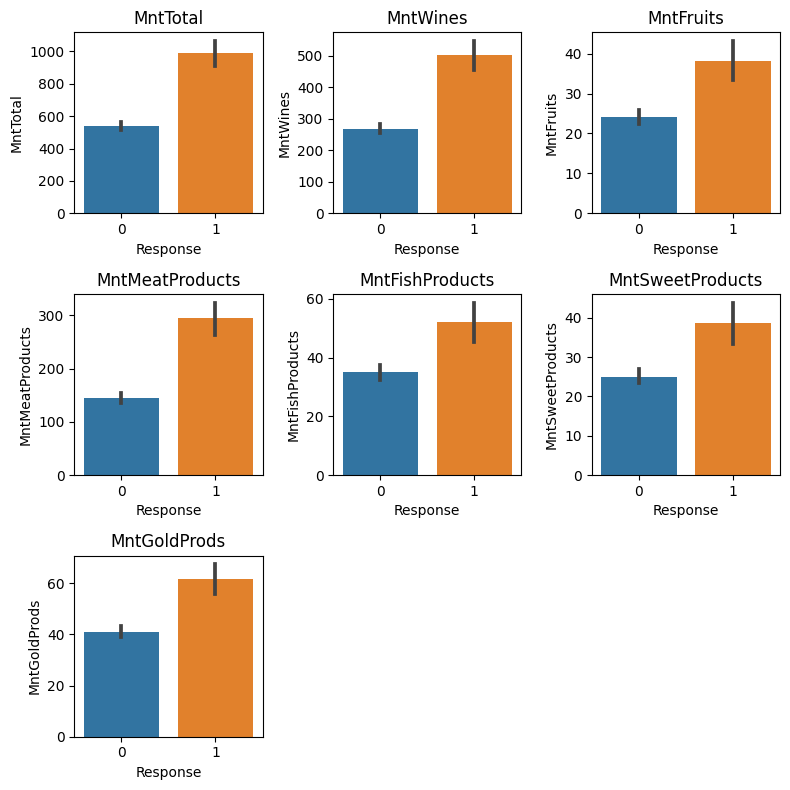

In [29]:
columns = ['MntTotal', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(len(columns) / n_cols))  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8,8))
axes = axes.flatten()  # Flatten axes for easy iteration

for i, col in enumerate(columns):
    sns.barplot(data=df, x='Response', y=col, ax=axes[i])
    axes[i].set_title(col)

# Hide any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: xlabel='MntTotal', ylabel='Count'>

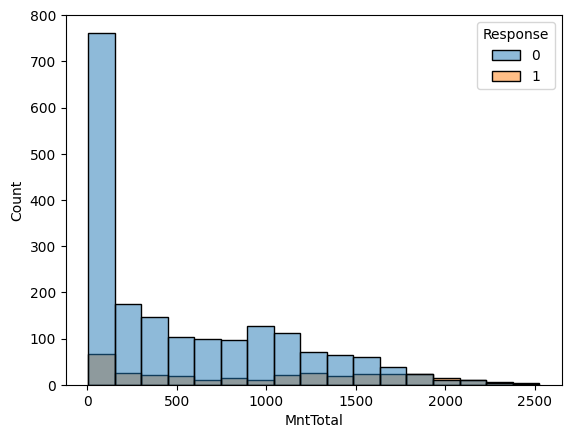

In [30]:
sns.histplot(data = df, x = 'MntTotal', hue = 'Response')

<Axes: xlabel='Fam_Size', ylabel='MntTotal'>

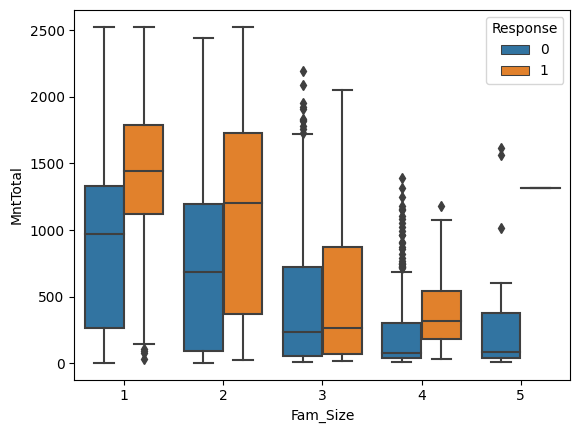

In [31]:
sns.boxplot(data = df, x = 'Fam_Size', y ='MntTotal', hue = 'Response')

<Axes: xlabel='Fam_Size', ylabel='Response'>

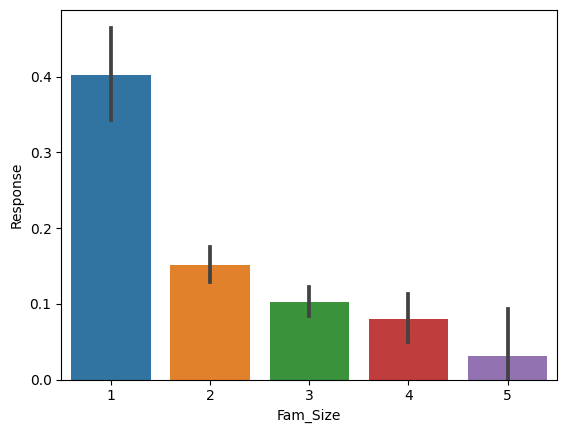

In [32]:
sns.barplot(data = df, x = 'Fam_Size', y = 'Response')

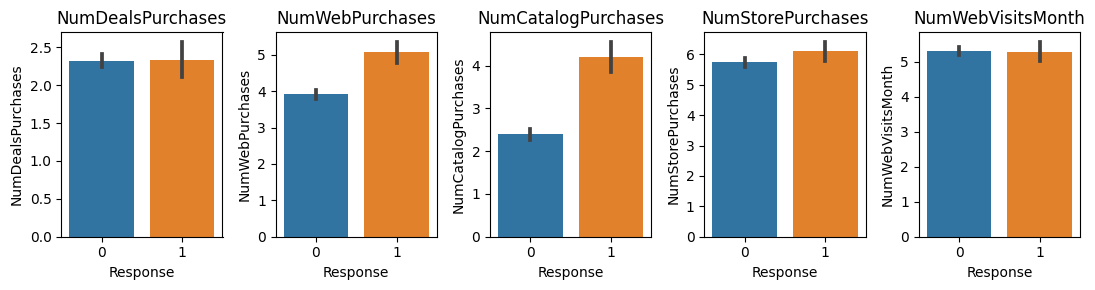

In [33]:
columns = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
n_cols = 5  # Number of columns in the grid
n_rows = int(np.ceil(len(columns) / n_cols))  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(11,3))
axes = axes.flatten()  # Flatten axes for easy iteration

for i, col in enumerate(columns):
    sns.barplot(data=df, x='Response', y=col, ax=axes[i])
    axes[i].set_title(col)

# Hide any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: xlabel='Count', ylabel='NumStorePurchases'>

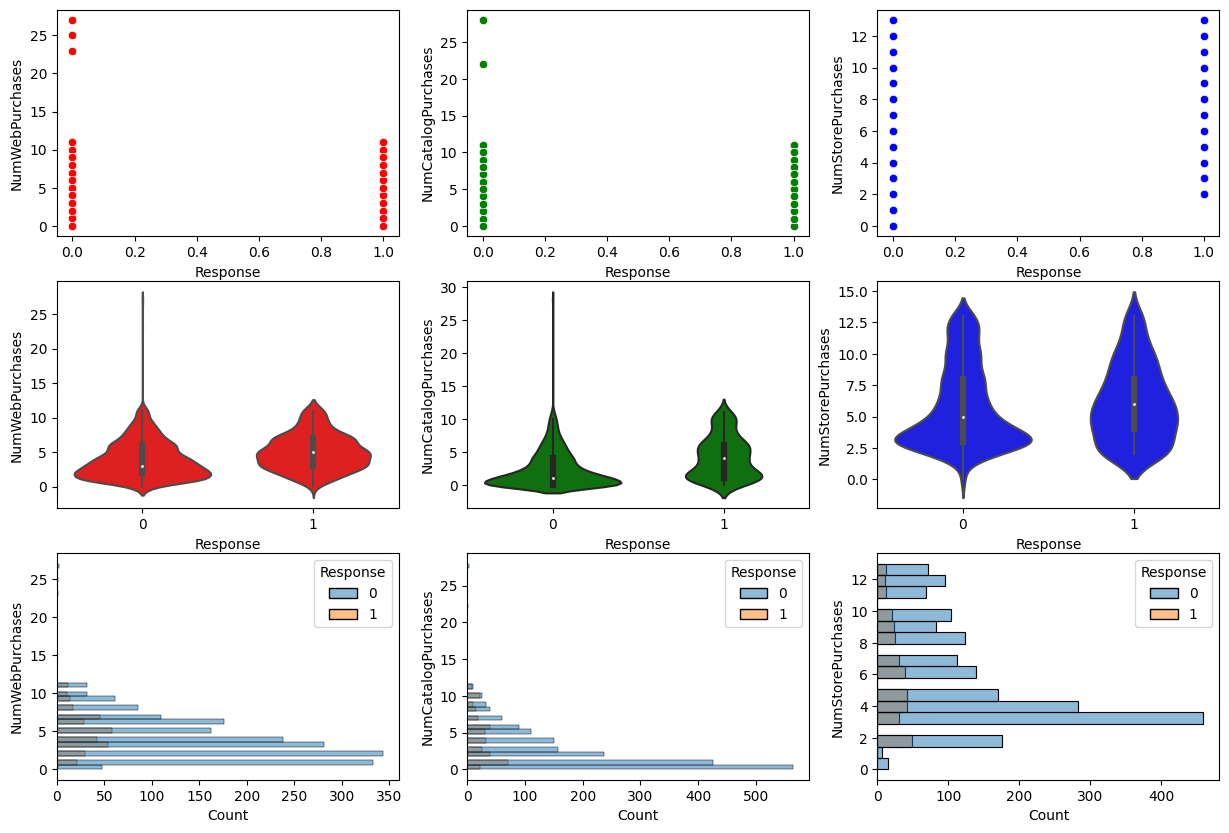

In [34]:
fig, ((ax1, ax2, ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3, figsize=(15, 10))

sns.scatterplot(data=df, x='Response', y='NumWebPurchases', ax=ax1,color = 'r')
sns.scatterplot(data=df, x='Response', y='NumCatalogPurchases', ax=ax2,color = 'g')
sns.scatterplot(data=df, x='Response', y='NumStorePurchases', ax=ax3,color = 'b')
sns.violinplot(data=df, x='Response', y='NumWebPurchases', ax=ax4,color = 'r')
sns.violinplot(data=df, x='Response', y='NumCatalogPurchases', ax=ax5,color = 'g')
sns.violinplot(data=df, x='Response', y='NumStorePurchases', ax=ax6,color = 'b')
sns.histplot(data=df, hue='Response', y='NumWebPurchases', ax=ax7,color = 'r')
sns.histplot(data=df, hue='Response', y='NumCatalogPurchases', ax=ax8,color = 'g')
sns.histplot(data=df, hue='Response', y='NumStorePurchases', ax=ax9,color = 'b')

<Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>

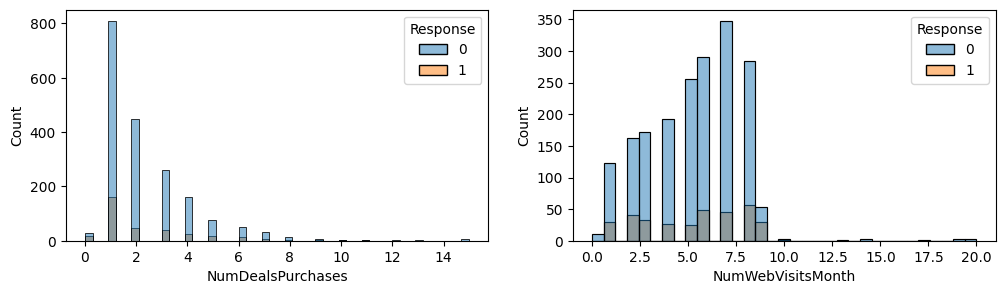

In [35]:
fig, ((ax1,ax2)) = plt.subplots(1,2,figsize = (12,3))
sns.histplot(data = df, x = 'NumDealsPurchases', hue = 'Response',ax = ax1)
sns.histplot(data = df, hue = 'Response', x = 'NumWebVisitsMonth',ax = ax2)

<Axes: xlabel='Complain', ylabel='Age'>

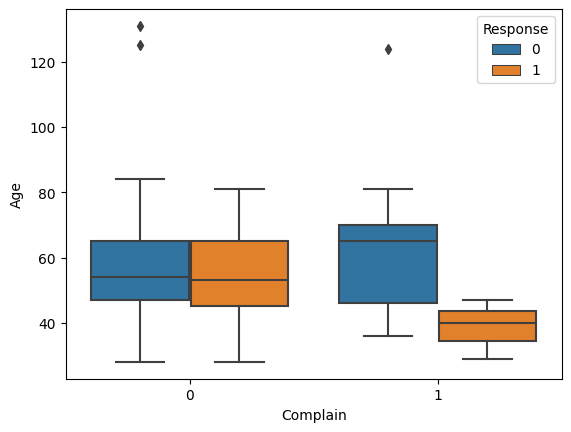

In [36]:
sns.boxplot(data = df, x = 'Complain', y = 'Age', hue = 'Response')

<Axes: xlabel='Response', ylabel='Num_Accepted'>

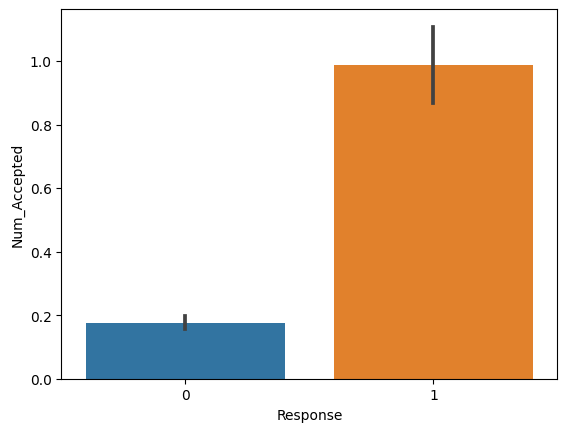

In [37]:
sns.barplot(data = df, x = 'Response', y = 'Num_Accepted')

In [38]:
# Percentage of people who responded positively on the last campaign
pos_resp = df.Response.sum()
total = df.shape[0]
percent = round((pos_resp / total)*100, 2)

print(pos_resp, 'customers responded to the marketing campaign out of a total of', total, 'cutomers.')
print('Percent Responded: ' +  str(percent) + '%')

334 customers responded to the marketing campaign out of a total of 2239 cutomers.
Percent Responded: 14.92%


In [39]:
#Viewing feature correlations with the 'Response' column
#Note: 'Response' will be the target for predictive modeling
response_corr = df.drop('Education',axis = 1).corr()['Response'].sort_values(ascending=False)[1:]
print("Correlation Coefficients for 'Response'")
print('--------------------------------------------------------')
print(response_corr)

Correlation Coefficients for 'Response'
--------------------------------------------------------
Num_Accepted           0.425988
MntTotal               0.265188
MntWines               0.247143
MntMeatProducts        0.236244
NumCatalogPurchases    0.220729
Days_Since_Customer    0.194525
Income                 0.160786
NumWebPurchases        0.148667
MntGoldProds           0.139753
MntFruits              0.125239
MntSweetProducts       0.117269
MntFishProducts        0.111241
NumStorePurchases      0.039211
NumDealsPurchases      0.002401
Complain              -0.001725
NumWebVisitsMonth     -0.003934
Age                   -0.021456
ID                    -0.021754
Recency               -0.198649
Fam_Size              -0.219374
Name: Response, dtype: float64


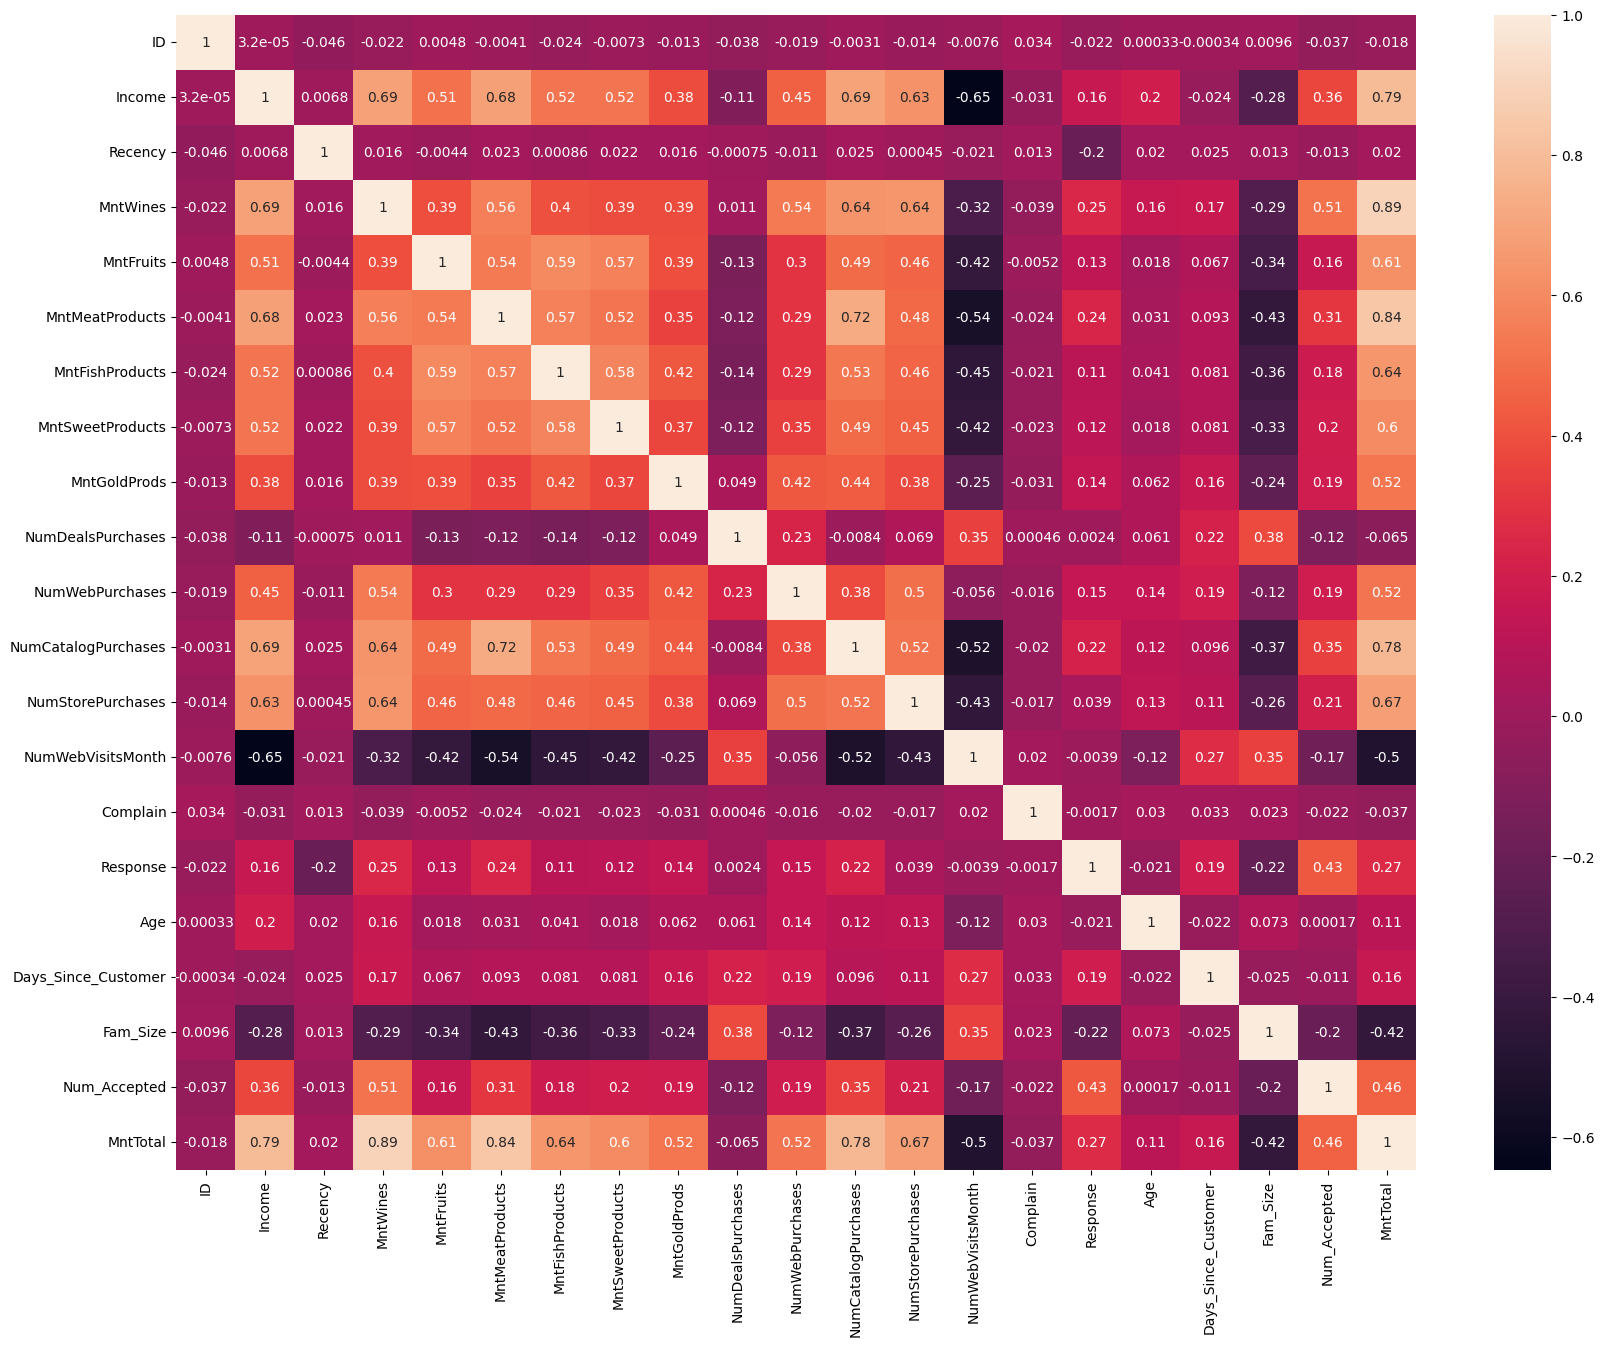

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(df.drop('Education',axis = 1).corr(),annot=True)
plt.show()

# Conclusion after EDA

1. Customers having basic education tend to have lower income than other customers. People with more Income have higher probability of accepting the offer in the last campaign

2. The higher the recency (i.e. number of days since customer's last purchase), more likely is they dont accept the last campaign offer. 

3. As the total amount spent by the customer in the last two year increases, their chance of going with the last campaign also increases.

4. As the family size decreases, they are more likely to accept the last campaign offer. The higher the family size, lower is the amount spent in last couple of years.

5. If a customer has no or very less number of purcahses made through the website or catalog then they are most likely to miss this campaign offer as well

6. Older people have much more complaints than younger people. Although people irrespective of their age and complaints have participated in the current campaign equally.

7. Customers having higher Num_Accepted offers are most likely to accept the current campaign offer as well.

# Dimensionality Reduction

In [45]:
df

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Fam_Size,Num_Accepted,MntTotal
0,5524,Graduation,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,67,4333.737757,1,0,1617
1,2174,Graduation,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,70,3783.737757,3,0,27
2,4141,Graduation,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,59,3982.737757,2,0,776
3,6182,Graduation,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,40,3809.737757,3,0,53
4,5324,PhD,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,43,3831.737757,3,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,57,4051.737757,3,0,1341
2236,4001,PhD,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,78,3689.737757,5,1,444
2237,7270,Graduation,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,43,3825.737757,1,1,1241
2238,8235,Master,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,68,3826.737757,3,0,843


In [46]:
df.set_index('ID',inplace = True)

In [48]:
#Remove the 'Response' column because it is the target of future predictive model
X, y = df.drop('Response', axis=1).values, df['Response'].values

#Creates a column transformer that sends 'Education' to be encoded and rest scaled
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ct = ColumnTransformer([
    ('catagoric', OneHotEncoder(), [0]),
    ('numeric', StandardScaler(), list(range(1, len(X.T))))
])

#Sends the data through the column transformer
X_transformed = ct.fit_transform(X)
print('Preprocessed Data:')
print(X_transformed[0])

Preprocessed Data:
[ 0.          0.          1.          0.          0.          0.28844609
  0.30662377  0.98333899  1.55112562  1.679196    2.46151666  1.47601996
  0.84281547  0.34978184  1.40886293  2.51025708 -0.55113587  0.69388693
 -0.09730359  0.98492226  1.53094037 -1.75860085 -0.43915407  1.67894446]


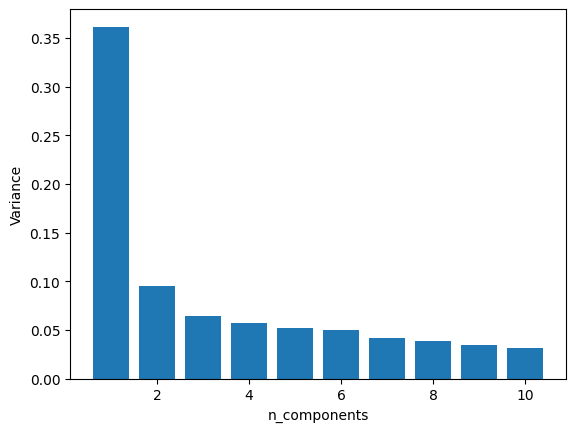

In [71]:
# Comparing variance covered by top 10 components
pca_10 = PCA(10)
pca_10.fit(X_transformed)
plt.bar(np.arange(1,11),pca_10.explained_variance_ratio_)
plt.xlabel("n_components")
plt.ylabel("Variance")
plt.show()

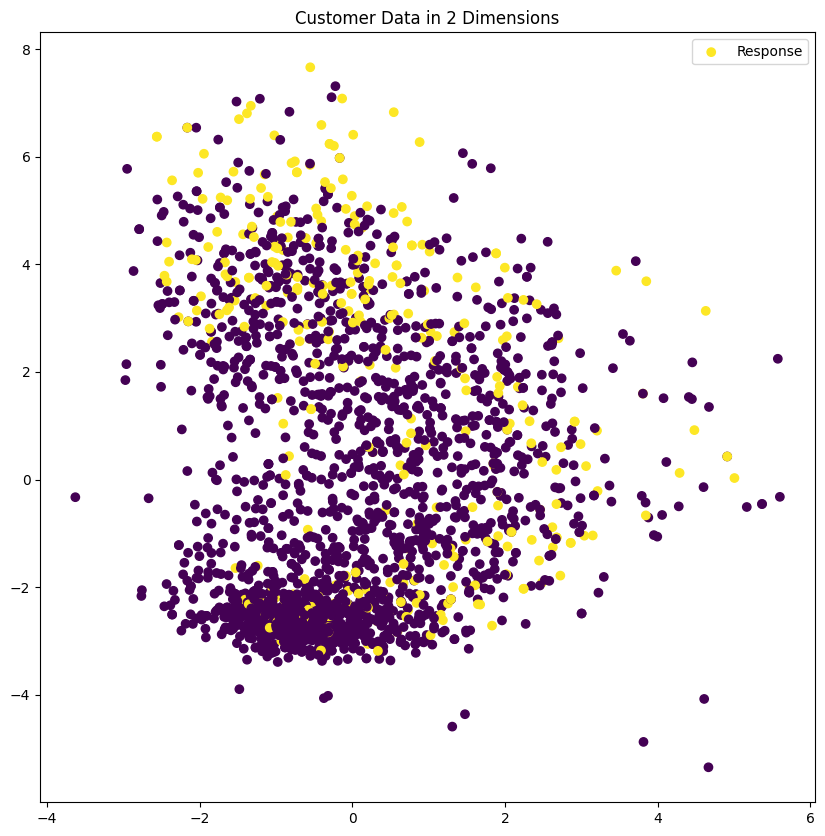

In [81]:
#n_components=3 will be chosen in order to visualize the data better
pca = PCA(n_components=2)

#fit to dataset
pca.fit(X_transformed)

#create dimentionality reduced dataset
X_reduced = pca.transform(X_transformed)

fig = plt.figure(figsize=(10,10))
plt.scatter(X_reduced.T[1],X_reduced.T[0], c=y)
plt.title("Customer Data in 2 Dimensions")
plt.legend(['Response'])
plt.show()

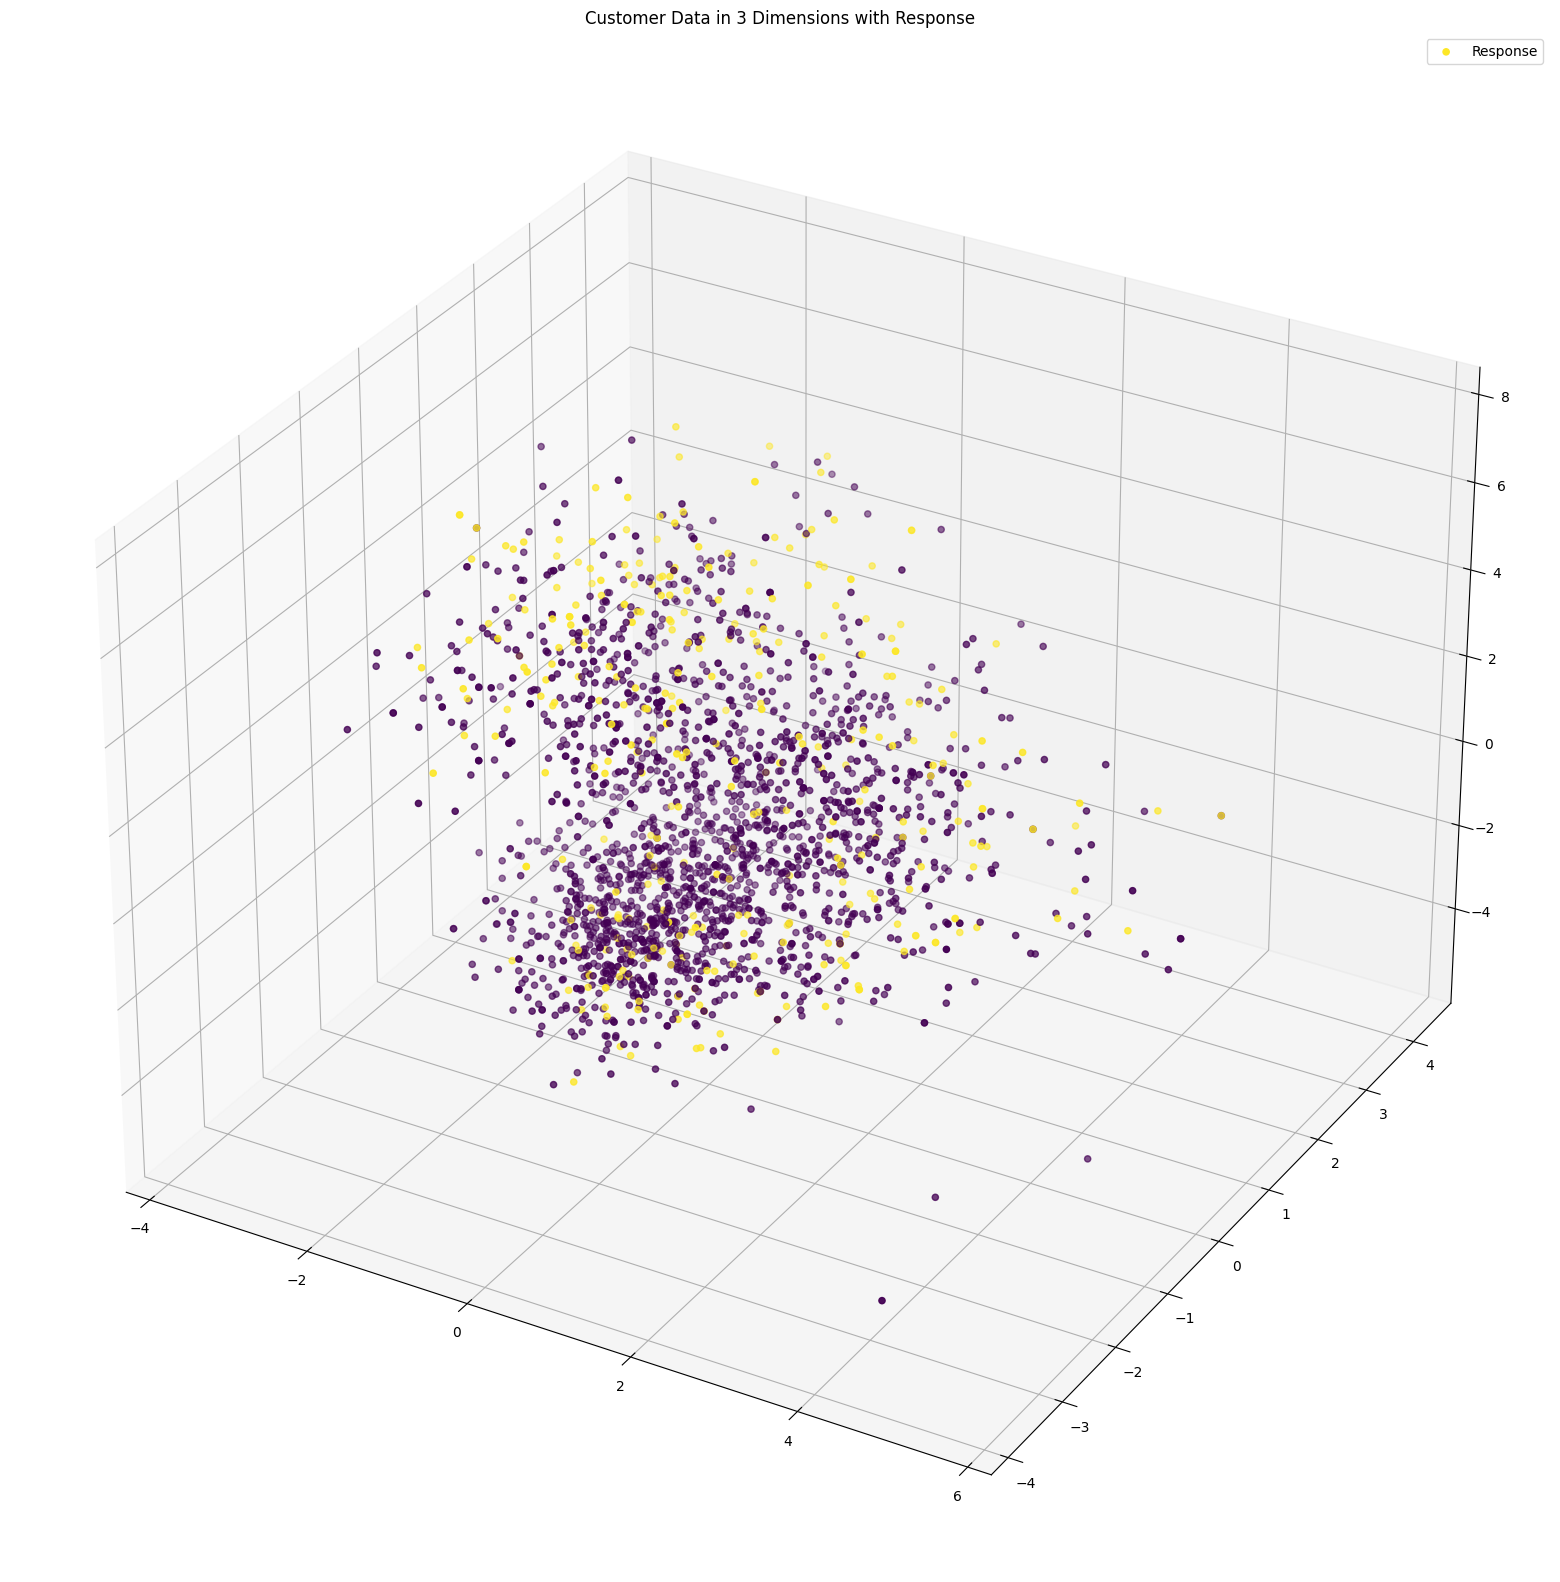

In [82]:
pca = PCA(n_components=3)

#fit to dataset
pca.fit(X_transformed)

#create dimentionality reduced dataset
X_reduced = pca.transform(X_transformed)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_reduced.T[1],X_reduced.T[2],X_reduced.T[0], c=y)
ax.set_title("Customer Data in 3 Dimensions with Response")
ax.legend(['Response'])
plt.show()

In [84]:
pca = PCA(n_components = 3)
pca.fit(X_transformed)

X_pca = pd.DataFrame(pca.transform(X_transformed), columns=["col1", "col2", "col3"])

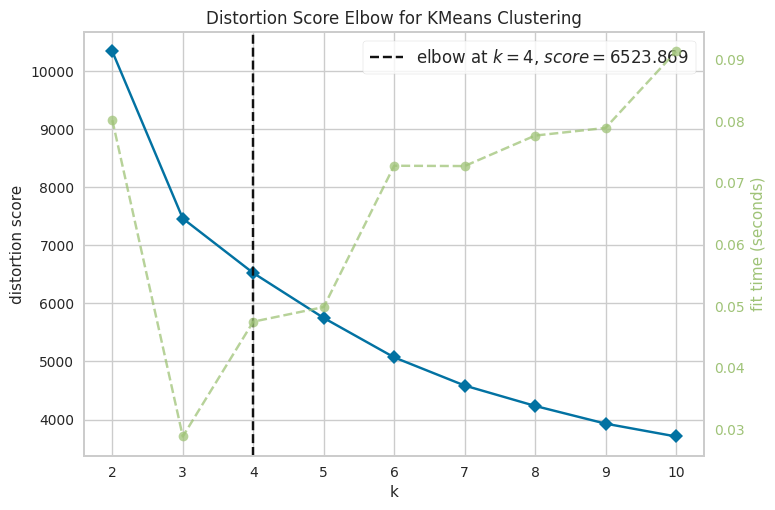

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

In [89]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X_pca)

In [92]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(X_pca, x="col1", y="col2", z="col3", color=predictions, title=f"Total Explained Variance: {total_var:.2f}%")
fig.show()

Total explained variance for the first 3 components is 52.11%. So, I opt to select the first 7 components because they approximately 75% of the information present in data.

In [94]:
pca = PCA(n_components = 7)
pca.fit(X_transformed)

X_pca = pd.DataFrame(pca.transform(X_transformed), columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7"])

In [95]:
total_var = pca.explained_variance_ratio_.sum() * 100
print("Explained Total Variance:",total_var)

Explained Total Variance: 72.27499748521812


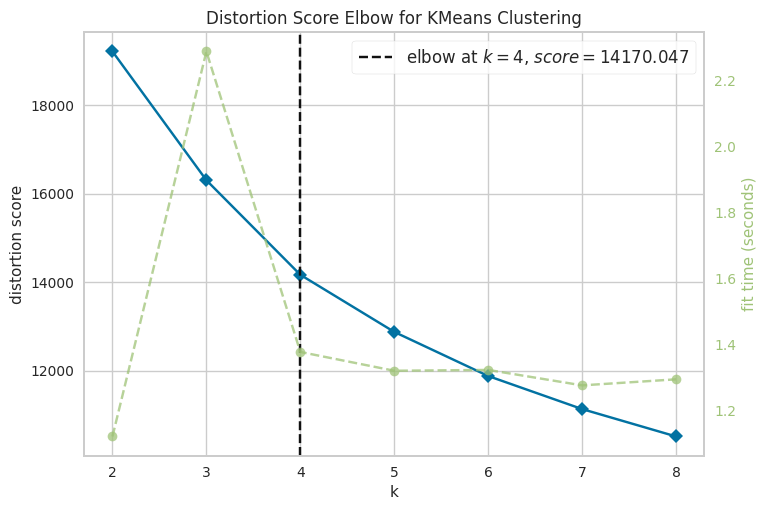

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
elbow_graph = KElbowVisualizer(KMeans(), k=8)
elbow_graph.fit(X_pca)
elbow_graph.show()

Here, we use the KElbowVisualizer for 7-dimensional data. It looks like we should keep selecting 4 clusters.

In [101]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X_pca)

df["Clusters"] = predictions

In [103]:
import plotly.graph_objects as go
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

cluster0_num = df[df["Clusters"]==0].shape[0]
cluster1_num = df[df["Clusters"]==1].shape[0]
cluster2_num = df[df["Clusters"]==2].shape[0]
cluster3_num = df[df["Clusters"]==3].shape[0]
values = [cluster0_num, cluster1_num, cluster2_num, cluster3_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title="Clusters")])
fig.show()

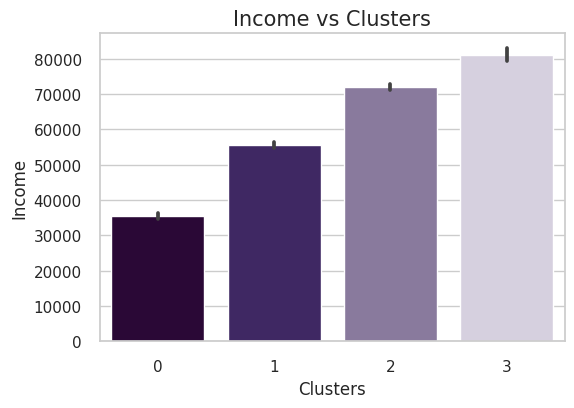

In [114]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(6, 4))
sns.barplot(x=df["Clusters"], y=df["Income"], palette=pal)
plt.title("Income vs Clusters", size=15)
plt.show()

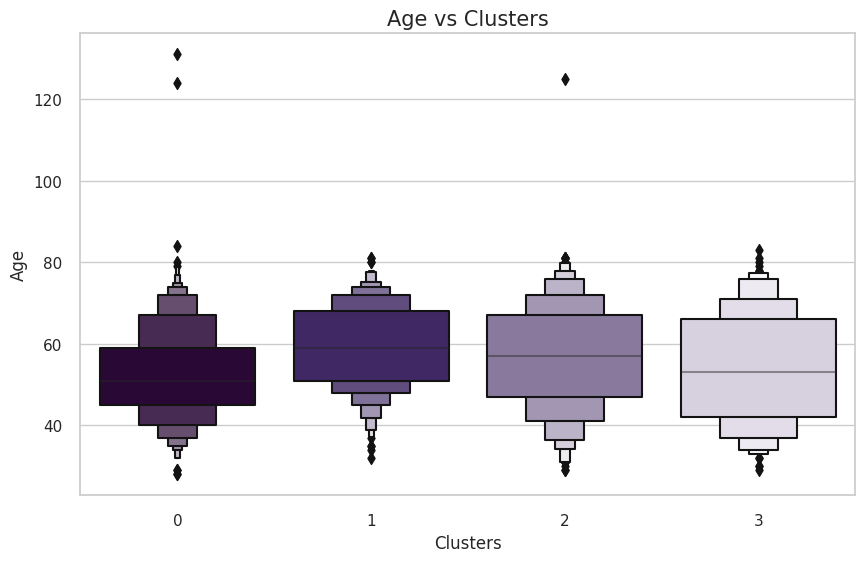

In [135]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x=df["Clusters"], y=df["Age"], palette=pal)
plt.title("Age vs Clusters", size=15)
plt.show()

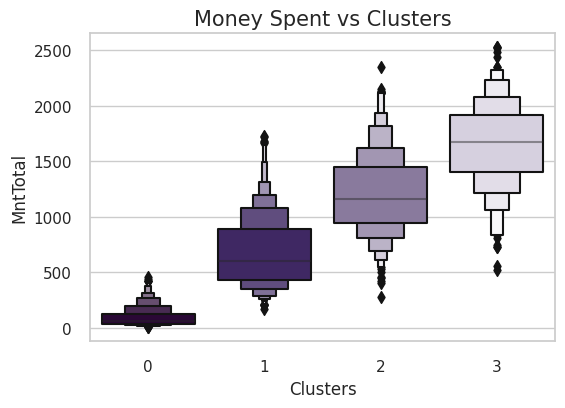

In [116]:
plt.figure(figsize=(6, 4))
sns.boxenplot(x=df["Clusters"], y=df["MntTotal"], palette=pal)
plt.title("Money Spent vs Clusters", size=15)
plt.show()

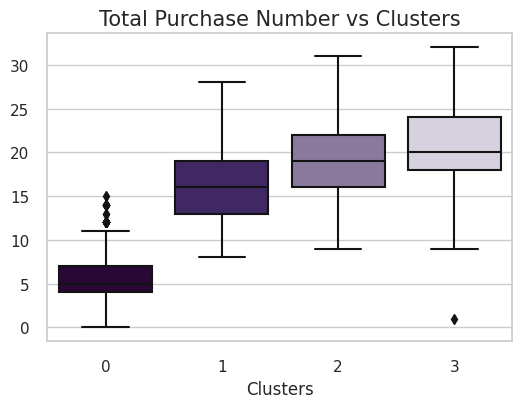

In [117]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Clusters"], y=df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"], palette=pal)
plt.title("Total Purchase Number vs Clusters", size=15)
plt.show()

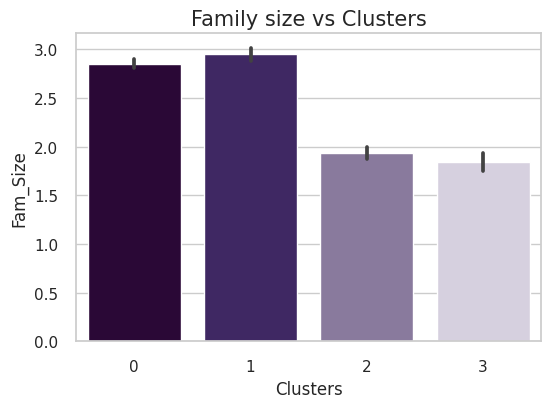

In [118]:
plt.figure(figsize=(6,4))
sns.barplot(x=df["Clusters"], y=df["Fam_Size"], palette=pal)
plt.title("Family size vs Clusters", size=15)
plt.show()

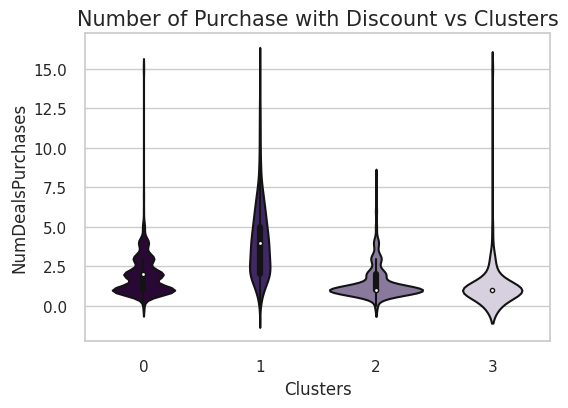

In [119]:
plt.figure(figsize=(6,4))
sns.violinplot(x=df["Clusters"], y=df["NumDealsPurchases"], palette=pal)
plt.title("Number of Purchase with Discount vs Clusters", size=15)
plt.show()

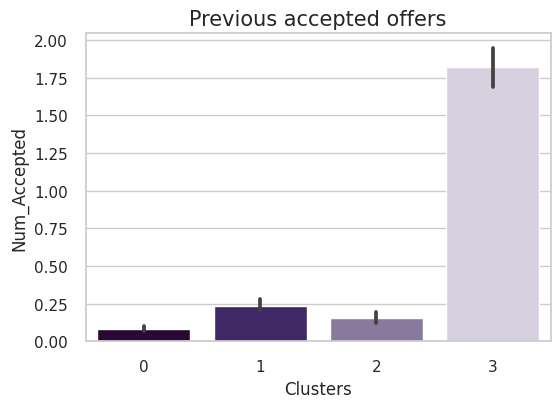

In [131]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df["Clusters"], y=df["Num_Accepted"], palette=pal)
plt.title("Previous accepted offers", size=15)
plt.show()

<Axes: xlabel='Days_Since_Customer', ylabel='Density'>

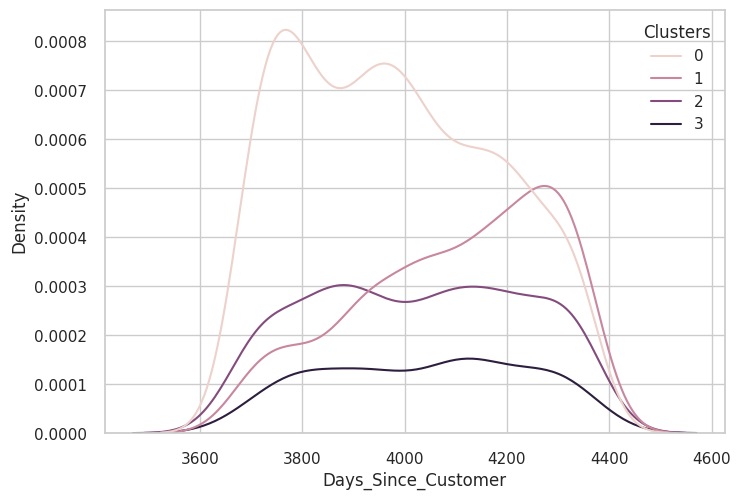

In [133]:
sns.kdeplot(data = df, x = 'Days_Since_Customer', hue = 'Clusters')

# Conclusions after clustering

**Cluster 0 :**
* Comprises of 46% customers (Largest pool)
* Least Income
* Least money spent
* Least Number of purchases
* Large Family size

**Cluster 1**
* Oldest Cluster 
* low income + low spending
* Long time customer
* Largest Family size
* Highest number of purchases with discount

**Cluster 2**
* High income
* High number of purchases
* Low family size
* Doesnt utilise discounts much

**Cluster 3**
* Smallest pool (only 9%)
* Highest Income and spending
* Most purchases
* Low family size
* Regular customers